# Analisis Isa


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

- Limpieza de datos

In [2]:
import pandas as pd

def clean_data(df):
    # Drop column: 'EXPEDIENTE'
    df = df.drop(columns=['EXPEDIENTE'])
    # Drop columns: 'RAQ', 'CIRUGIA P1' and 2 other columns
    df = df.drop(columns=['RAQ', 'CIRUGIA P1', 'CIRUGIA P2', 'NO PROCEDIMIENTOS'])
    # Derive column 'bougie' from column: 'BOUGIE'
    def bougie(BOUGIE):
        """
        Transform based on the following examples:
           BOUGIE    Output
        1: "NO"   => "0"
        2: "SI"   => "1"
        """
        if BOUGIE == "NO":
            return "0"
        if BOUGIE == "SI":
            return "1"
        return None
    df.insert(6, "bougie", df.apply(lambda row : bougie(row["BOUGIE"]), axis=1))
    # Drop column: 'BOUGIE'
    df = df.drop(columns=['BOUGIE'])
    # Derive column 'genero' from column: 'GENERO'
    def genero(GENERO):
        """
        Transform based on the following examples:
           GENERO    Output
        1: "F"    => "1"
        2: "M"    => "0"
        """
        if GENERO == "M":
            return "0"
        if GENERO == "F":
            return "1"
        return None
    df.insert(1, "genero", df.apply(lambda row : genero(row["GENERO"]), axis=1))
    # Drop column: 'GENERO'
    df = df.drop(columns=['GENERO'])
    return df

# Loaded variable 'df' from URI: c:\Users\Bruno\Documents\GitHub\4fun\Isa.csv
df = pd.read_csv(r'c:\Users\Bruno\Documents\GitHub\4fun\Isa.csv')

df_clean = clean_data(df.copy())
df_clean.head()

,genero,EDAD,IMC,IPID,ASA,bougie,CORMACK LEHANE,NO INTENTOS
0,1,27,19.7,8,1,0,1,1
1,0,50,24.3,10,1,1,2,1
2,0,32,21.5,9,1,1,2,1
3,1,27,22.4,10,1,0,1,1
4,0,25,19.0,9,1,0,2,1


- Descripcion de datos

In [3]:
df_clean.describe()

,EDAD,IMC,IPID,ASA,CORMACK LEHANE,NO INTENTOS
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,38.813953,31.856977,10.662791,1.709302,1.813953,1.151163
std,16.584551,5.842734,2.394162,0.591435,0.743784,0.360308
min,15.000000,19.000000,8.000000,1.000000,1.000000,1.000000
25%,25.000000,27.850000,9.000000,1.000000,1.000000,1.000000
50%,35.500000,31.900000,10.000000,2.000000,2.000000,1.000000
75%,50.000000,36.025000,12.000000,2.000000,2.000000,1.000000
max,81.000000,45.000000,16.000000,3.000000,4.000000,2.000000


-----
- Distribuciones Generales

<Figure size 1200x1000 with 0 Axes>

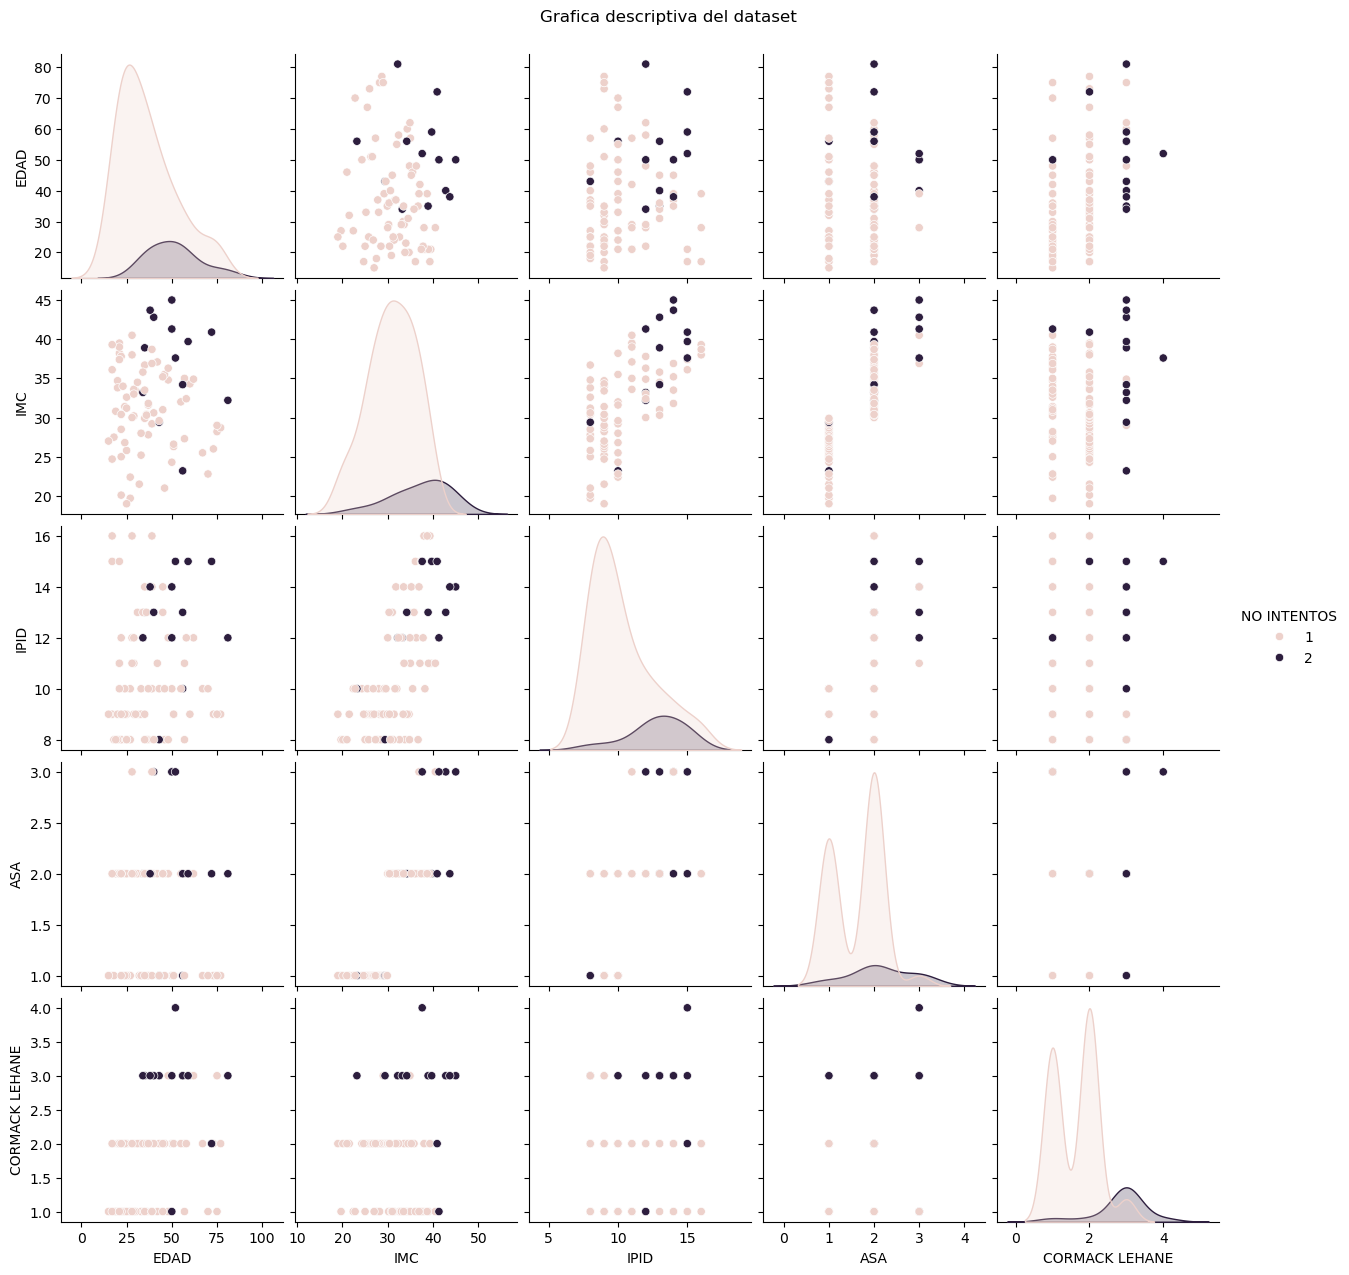

In [61]:
plt.figure(figsize=(12, 10))
ax = sns.pairplot(df_clean, hue='NO INTENTOS')
ax.fig.suptitle("Grafica descriptiva del dataset", y=1.02)
plt.show()

-----
- Relaciones Directas

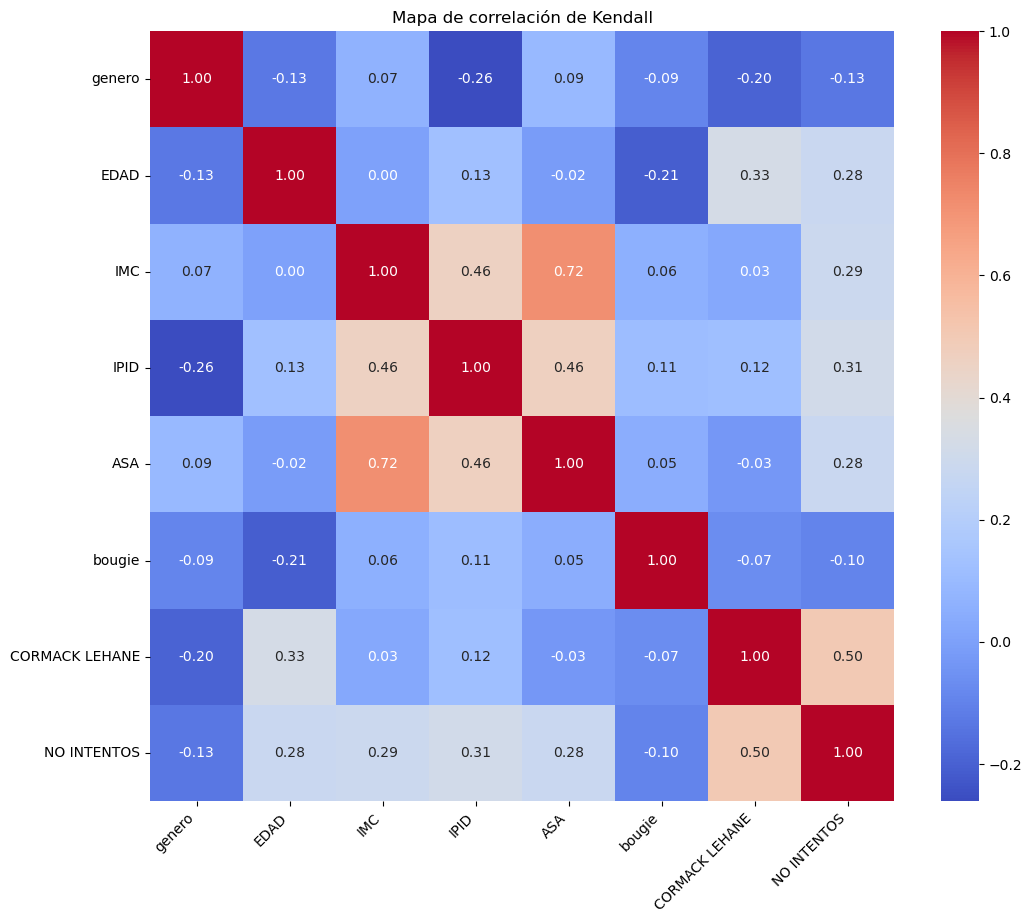

In [62]:
plt.figure(figsize=(12, 10))
ax =sns.heatmap(df_clean.corr('kendall'), annot=True, cmap='coolwarm', fmt=".2f")
ax.set_title("Mapa de correlación de Kendall")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

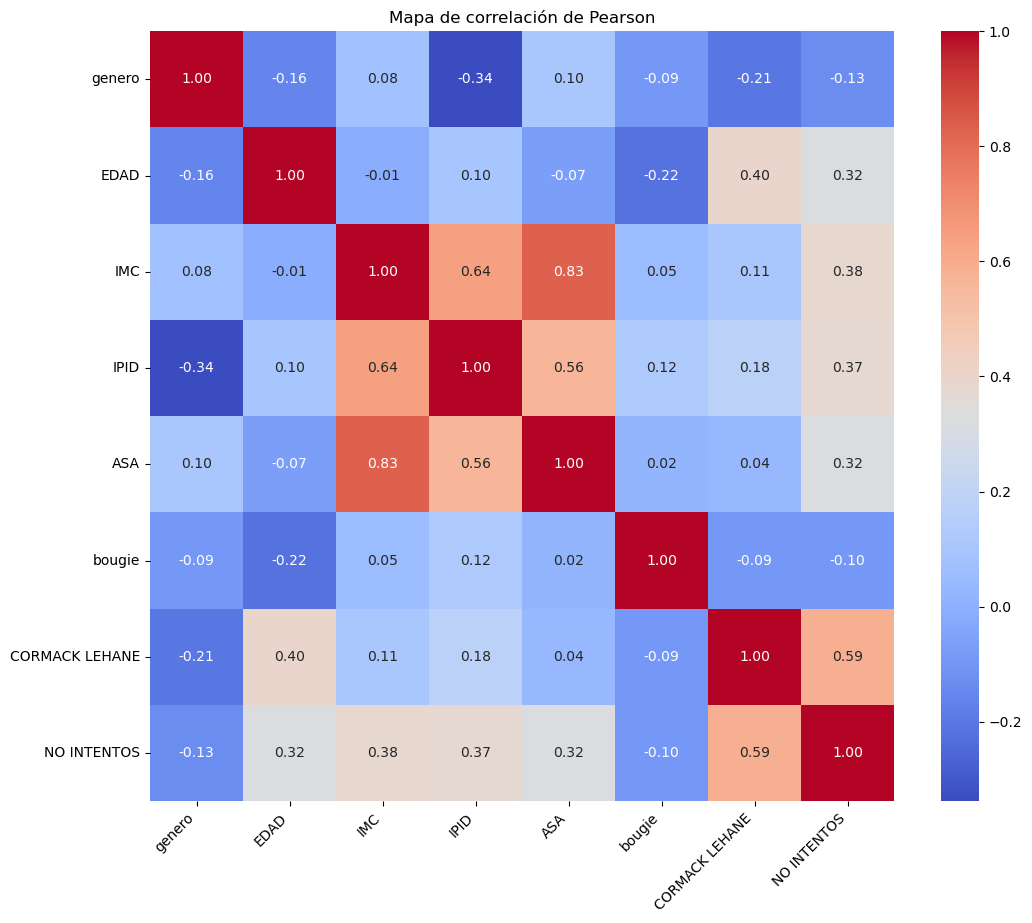

In [63]:
plt.figure(figsize=(12, 10))
ax =sns.heatmap(df_clean.corr('pearson'), annot=True, cmap='coolwarm', fmt=".2f")
ax.set_title("Mapa de correlación de Pearson")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

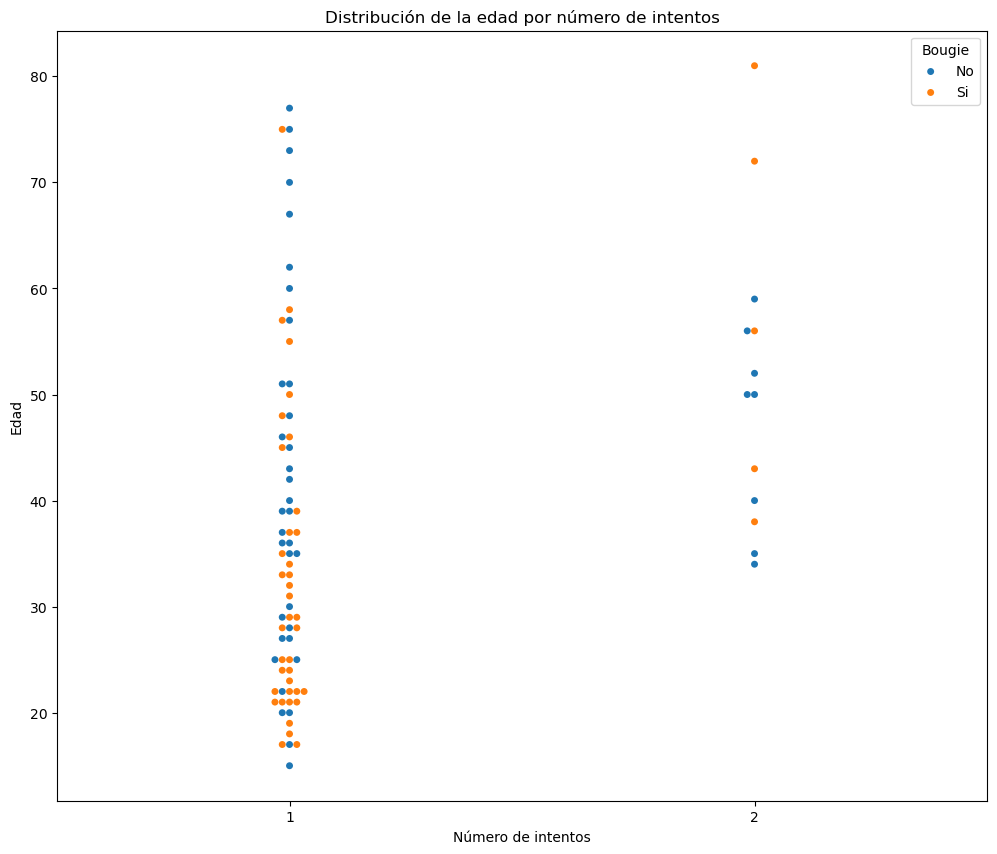

In [86]:
plt.figure(figsize=(12, 10))
ax = sns.swarmplot(x='NO INTENTOS', y='EDAD', data=df_clean, hue='bougie')
ax.set_title("Distribución de la edad por número de intentos")
ax.set_xlabel("Número de intentos")
ax.set_ylabel("Edad")
ax.legend(title='Bougie', loc='upper right', labels=['No', 'Si'])
plt.show()

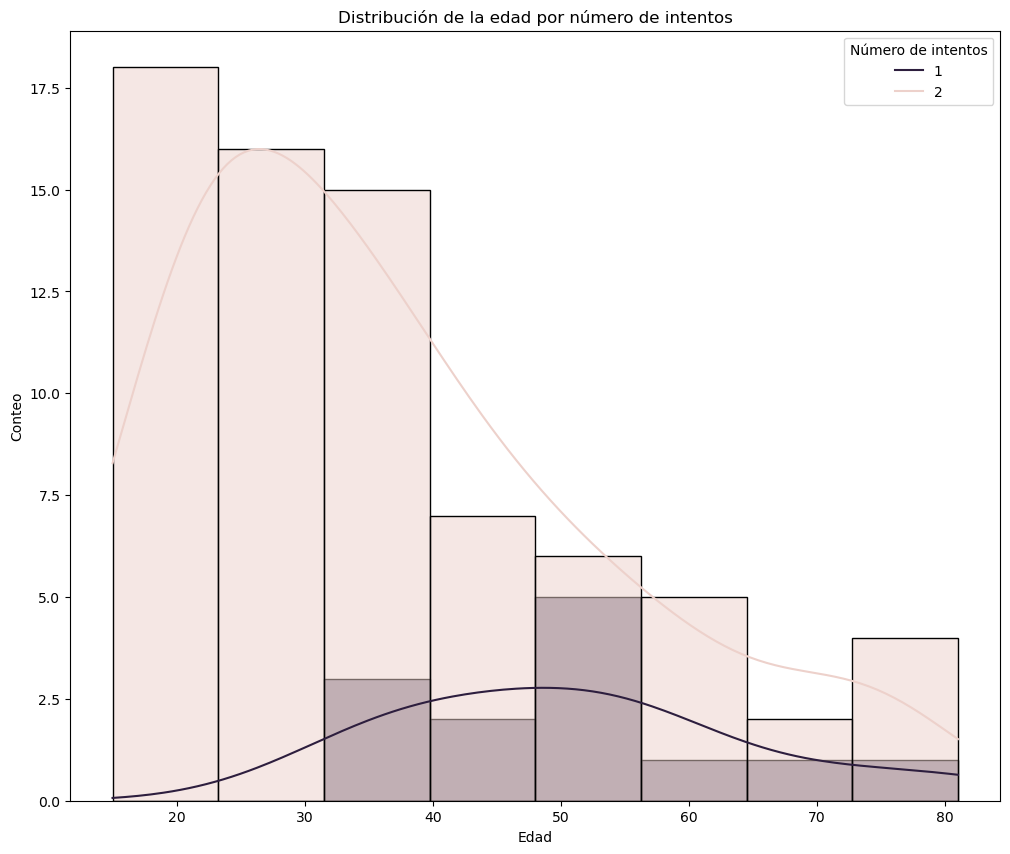

In [67]:
plt.figure(figsize=(12, 10))
ax = sns.histplot(data=df_clean, x='EDAD', hue='NO INTENTOS', kde=True )
ax.set_title("Distribución de la edad por número de intentos")
ax.set_xlabel("Edad")
ax.set_ylabel("Conteo")
ax.legend(title='Número de intentos', loc='upper right', labels=['1', '2'])
plt.show()

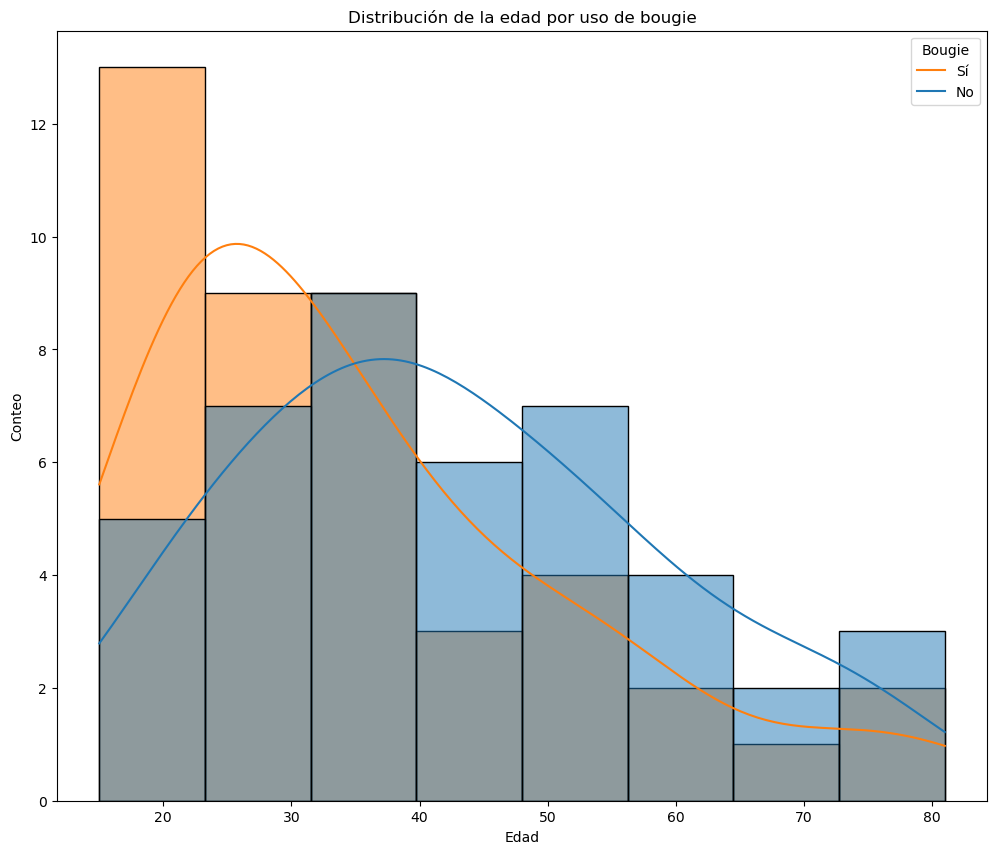

In [69]:
plt.figure(figsize=(12, 10))
ax = sns.histplot(data=df_clean, x='EDAD', hue='bougie', kde=True)
ax.set_title("Distribución de la edad por uso de bougie")
ax.set_xlabel("Edad")
ax.set_ylabel("Conteo")
ax.legend(title='Bougie', loc='upper right', labels=['Sí', 'No'])
plt.show()

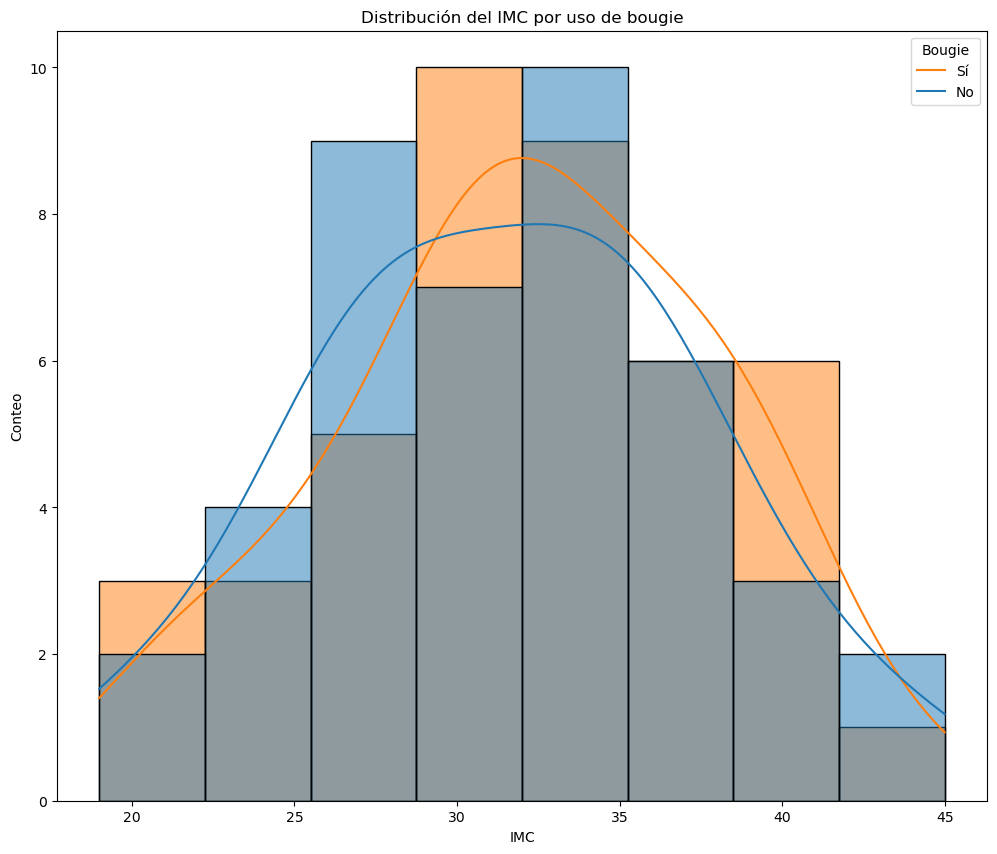

In [70]:
plt.figure(figsize=(12, 10))
ax = sns.histplot(data=df_clean, x='IMC', hue='bougie', kde=True)
ax.set_title("Distribución del IMC por uso de bougie")
ax.set_xlabel("IMC")
ax.set_ylabel("Conteo")
ax.legend(title='Bougie', loc='upper right', labels=['Sí', 'No'])
plt.show()

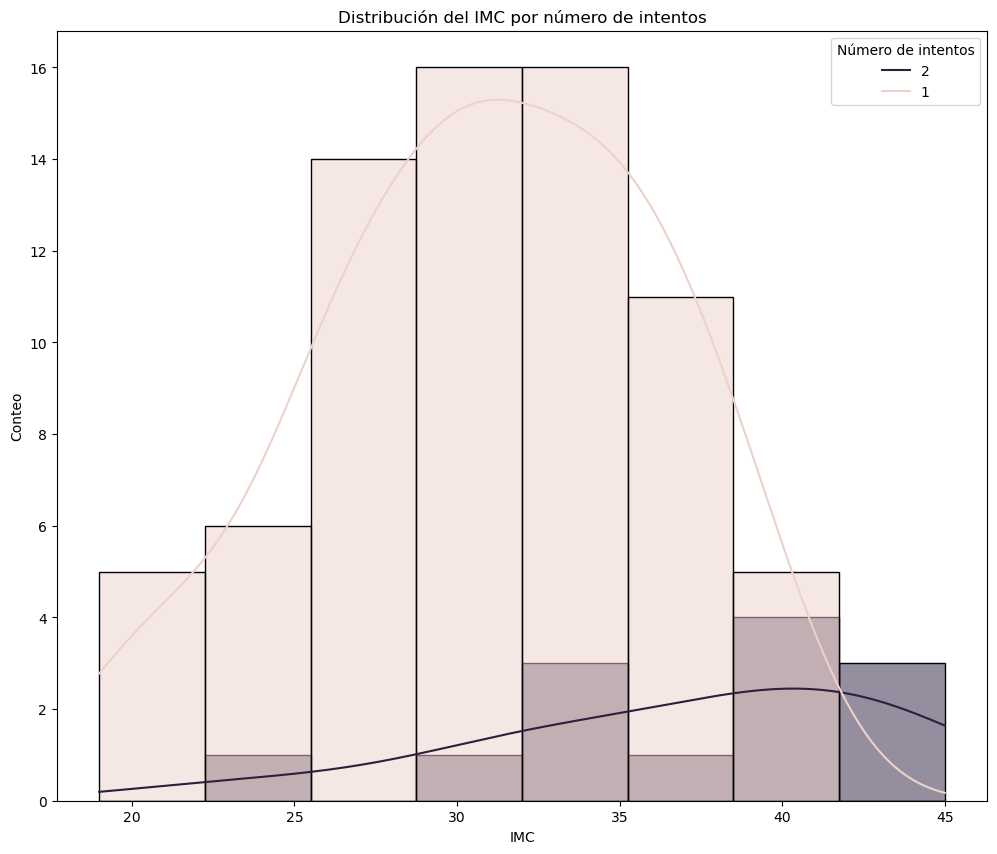

In [74]:
plt.figure(figsize=(12, 10))
ax = sns.histplot(data=df_clean, x='IMC', hue='NO INTENTOS', kde=True)
ax.set_title("Distribución del IMC por número de intentos")
ax.set_xlabel("IMC")
ax.set_ylabel("Conteo")
ax.legend(title='Número de intentos', loc='upper right', labels=['2', '1'])
plt.show()


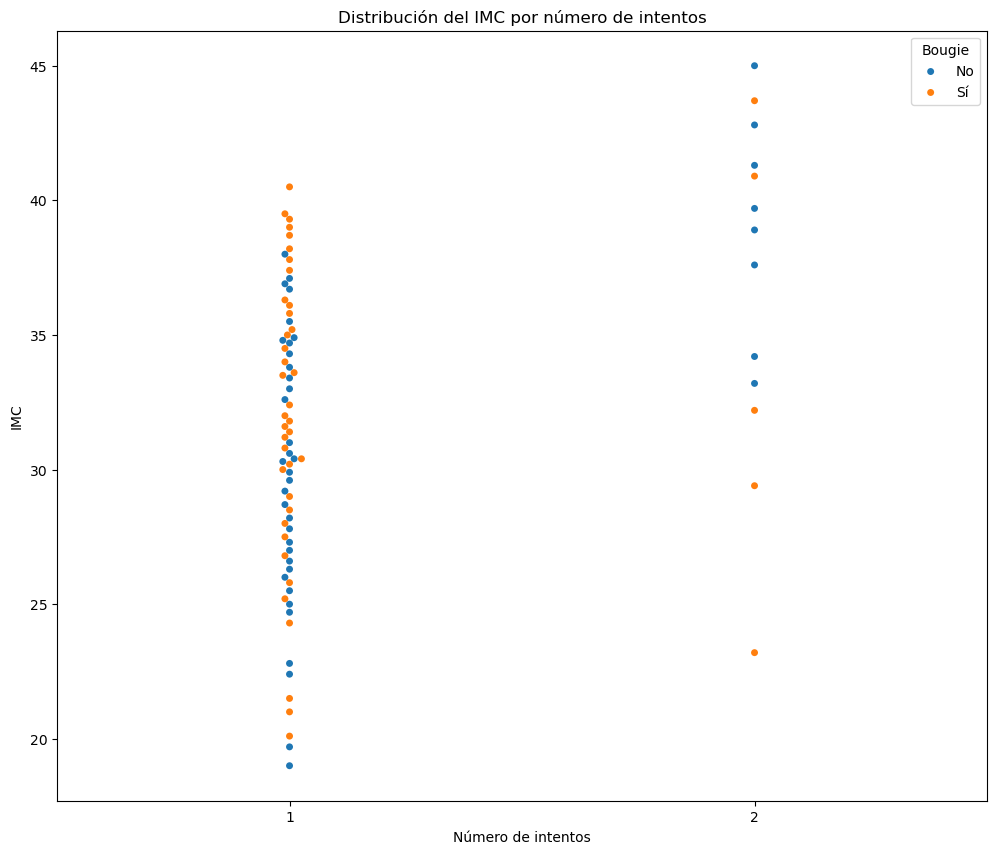

In [79]:
plt.figure(figsize=(12, 10))
ax = sns.swarmplot(x='NO INTENTOS', y='IMC', data=df_clean, hue='bougie')
ax.set_title("Distribución del IMC por número de intentos")
ax.set_xlabel("Número de intentos")
ax.set_ylabel("IMC")
ax.legend(title='Bougie', loc='upper right', labels=['No', 'Sí'])
plt.show()

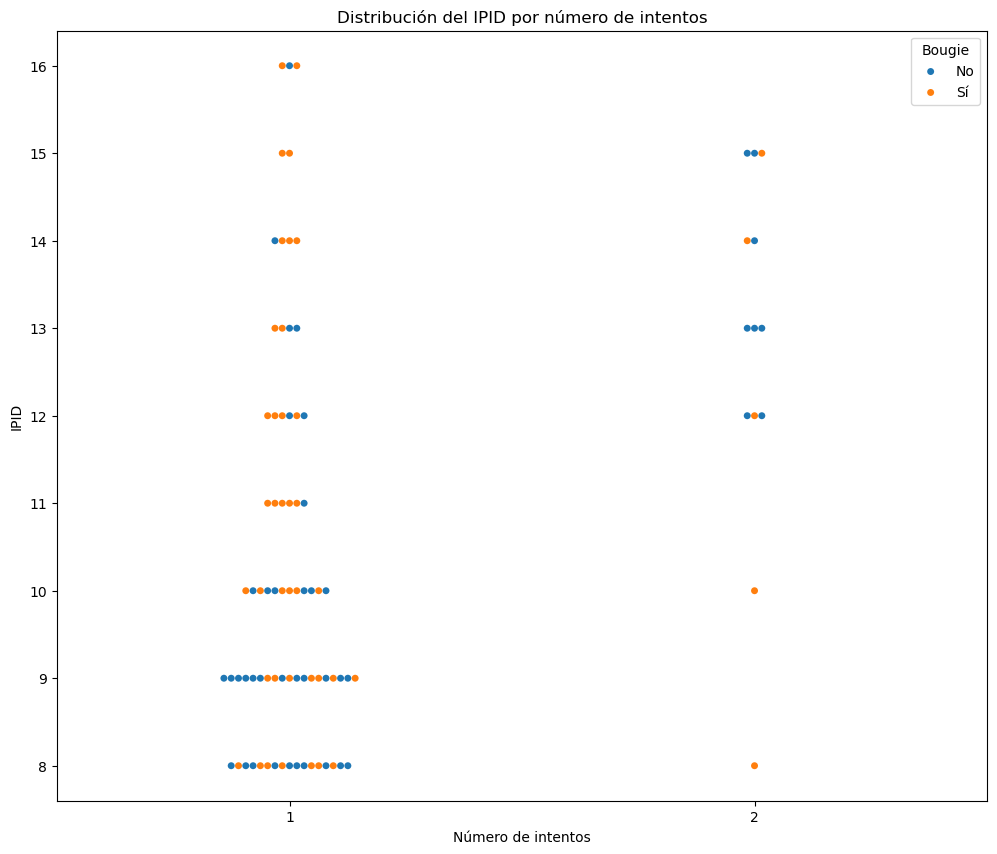

In [82]:
plt.figure(figsize=(12, 10))
ax = sns.swarmplot(x='NO INTENTOS', y='IPID', data=df_clean, hue='bougie')
ax.set_title("Distribución del IPID por número de intentos")
ax.set_xlabel("Número de intentos")
ax.set_ylabel("IPID")
ax.legend(title='Bougie', loc='upper right', labels=['No', 'Sí'])
plt.show()

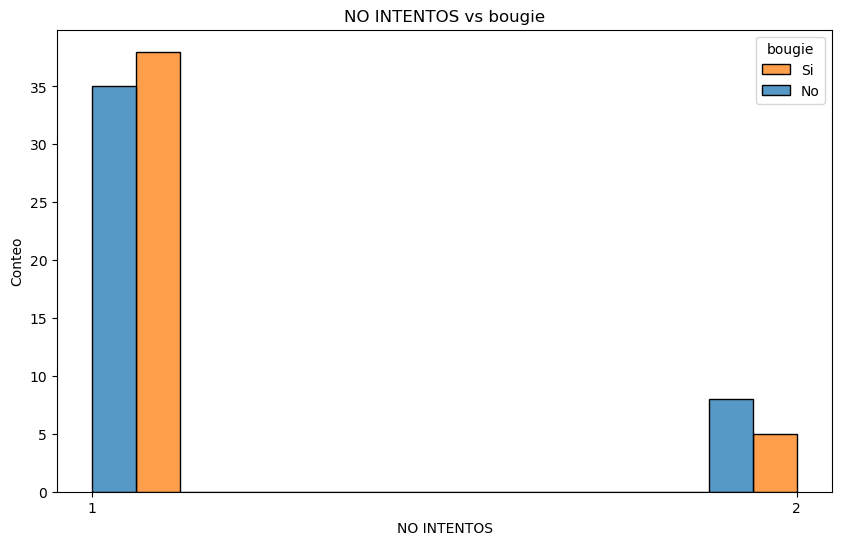

In [58]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df_clean, x='NO INTENTOS', hue='bougie', multiple='dodge') 
ax.set_title('NO INTENTOS vs bougie')
ax.set_xlabel('NO INTENTOS')
ax.set_ylabel('Conteo')
ax.legend(title='bougie', loc='upper right', labels=['Si', 'No'])
plt.xticks(ticks=[1,2], labels=['1', '2'])
plt.show()

In [83]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia
contingency_table = pd.crosstab(df_clean['bougie'], df_clean['NO INTENTOS'])

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Tabla de contingencia:")
print(contingency_table)
print("\nResultados de la prueba de chi-cuadrado:")
print(f"Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(expected)

# Interpretación del valor p
alpha = 0.05
if p < alpha:
    print("\nRechazamos la hipótesis nula. Existe una relación significativa entre 'bougie' y 'NO INTENTOS'.")
else:
    print("\nNo podemos rechazar la hipótesis nula. No existe una relación significativa entre 'bougie' y 'NO INTENTOS'.")

Tabla de contingencia:
NO INTENTOS   1  2
bougie            
0            35  8
1            38  5

Resultados de la prueba de chi-cuadrado:
Chi-cuadrado: 0.3624868282402529
Valor p: 0.5471283481830633
Grados de libertad: 1
Frecuencias esperadas:
[[36.5  6.5]
 [36.5  6.5]]

No podemos rechazar la hipótesis nula. No existe una relación significativa entre 'bougie' y 'NO INTENTOS'.
